# **Written by Zachary Pulliam**
_____________________________________________________________________________________________________________________________________________________________________________________________

This notebook is used to visualize the splits created by the Decision Tree Classifier with the data for each Synthetic Dataset. Here you hsould change your ROOT directory and ahcngae 'frame' to 1 through 4 to reflect which synthetic daatset you would like to visualize. The bin count can be changed by changing the value of 'k.'

_____________________________________________________________________________________________________________________________________________________________________________________________

Accuracy = 0.96


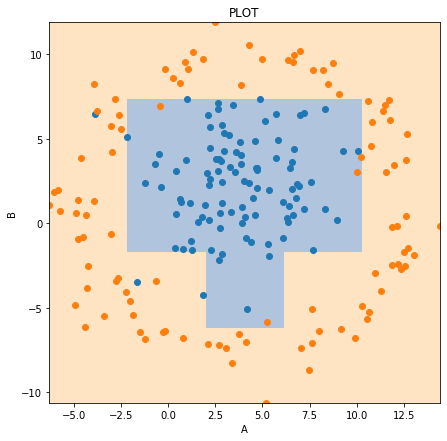

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from decisiontree import DecisionTree
from datasets import SyntheticDataset

"""variables for the user to change"""
ROOT = 'C:/Users/Zack\'s PC/Documents/UK Courses/CS 460/Assignment 1/data'   # change to your ROOT directory
frame = 4  # choose synthetic dataset1 1 through 4
k = 5  # number of bins


dfc = pd.read_csv(ROOT + '/synthetic-{x}.csv'.format(x=frame), names=['A','B','Label'])

df = SyntheticDataset(ROOT, frame, k)
tree = DecisionTree(df.train, 3)  # creates instance of DecisonTree
tree.fit()  # train DecisionTree
print("Accuracy =", tree.acc(df.test))
node = tree.node  # head node

fir_labels = []  # list of labels from first feature
sec_labels = []  # list of labels from second feature
sec_vals = []  # list of values from second feature

# creates lists which determines area and value of surfaces
if node.head == True:
    first_split = node.feat  # tells which boxes to draw first
if node.childs != None:
    for child in node.childs:
        if child.feat != None:
            fir_labels.append(True)
            labs, vals = [], []
            for i, n in enumerate(child.childs):
                labs.append(n.label)
                vals.append(n.value)
            sec_labels.append(vals)
            sec_vals.append(labs)
        else:
            fir_labels.append(child.label)
            sec_labels.append([])
            sec_vals.append([])

df_t = dfc.loc[dfc['Label'] == 1]  # subset of df with lable of 1
df_f = dfc.loc[dfc['Label'] == 0]  # subset of df with lable of 0

fig, ax = plt.subplots(figsize=(7,7))

x = df.bins[0]
y = df.bins[1]

if first_split == 'A_bins':
    for i, n in enumerate(fir_labels):
        if n is True:  # has childs
            for j, v in enumerate(sec_labels[i]):
                if sec_vals[i][j] == 0: c = 'bisque'
                else: c = 'lightsteelblue'
                ax.add_patch(Rectangle((x[i], y[j]), x[i+1]-x[i], y[j+1]-y[j], color=c,zorder=0))  # draw A boxes
        else:
            if n == 0: c = 'bisque'
            else: c = 'lightsteelblue'
            ax.add_patch(Rectangle((x[i], y[0]), x[i+1]-x[i], y[-1]-y[0], color=c,zorder=0))  # draw B boxes
else:
    for i, n in enumerate(fir_labels):
        if n is True:  # has childs
            for j, v in enumerate(sec_labels[i]):
                if sec_vals[i][j] == 0: c = 'bisque'
                else: c = 'lightsteelblue'
                ax.add_patch(Rectangle((x[j], y[i]), x[j+1]-x[j], y[i+1]-y[i], color=c,zorder=0))  # draw B boxes
        else:
            if n == 0: c = 'bisque'
            else: c = 'lightsteelblue'
            ax.add_patch(Rectangle((x[0], y[i]), x[-1]-x[0], y[i+1]-y[i], color=c,zorder=0))  # draw A boxes

colors = {0:'tab:blue', 1:'tab:orange'}
ax.scatter(df_t.A, df_t.B, c='tab:blue')
ax.scatter(df_f.A, df_f.B, c='tab:orange')
plt.xlabel("A")
plt.ylabel("B")
plt.title("PLOT")
plt.xlim([dfc['A'].min(), dfc['A'].max()])
plt.ylim([dfc['B'].min(), dfc['B'].max()])
plt.show()